In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
import time

In [ ]:
# ~ Data preprocessing section ~
# Save the training data from fashion-mnist_test.csv to the "train" DataFrame
train = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv")
# Save the testing data from fashion-mnist_test.csv to the "test" DataFrame
test = pd.read_csv("drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv")
# S = Number of Samples that we train our models
s=[1000,5000,10000,15000,30000,40000,60000]

In [ ]:
# In this section, we chose to train the best models from our last training section (in which we changed the number of nodes of each layer)
# We chose to keep 1 model per CNN type, 1 for a 1-Layer CNN, 1 for a 2-Layer CNN, 1 for a 3-Layer CNN, 1 for a 4-Layer CNN

# Define the 1st Convolutional Neural Network, the best of our 1-Layer CNN tested so far.
name1 = '1_NN_256'
cnn_model_1 = Sequential([], name = name1)
# 1st Convolutional Layer
cnn_model_1.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(128, activation='relu'))
cnn_model_1.add(Dense(10, activation='softmax'))

# Define the 2nd Convolutional Neural Network, the best of our 2-Layer CNN tested so far.
name2 = '2_NN_128_128'
cnn_model_2 = Sequential([], name = name2)
# 1st Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_2.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(128, activation='relu'))
cnn_model_2.add(Dense(10, activation='softmax'))

# Define the 3rd Convolutional Neural Network, the best of our 3-Layer CNN tested so far.
name3 = '3_NN_128_256_256'
cnn_model_3 = Sequential([], name = name3)
# 1st Convolutional Layer
cnn_model_3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_3.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_3.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_3.add(Dense(256, activation='relu'))
cnn_model_3.add(Flatten())
cnn_model_3.add(Dense(128, activation='relu'))
cnn_model_3.add(Dense(10, activation='softmax'))

# Define the 4th Convolutional Neural Network, the best of our 4-Layer CNN tested so far.
name4 = '4_NN_128_128_128_128'
cnn_model_4 = Sequential([],name = name4)
# 1st Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(BatchNormalization())
# 2nd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
# 3rd Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(Dense(128, activation='relu'))
# 4th Convolutional Layer
cnn_model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn_model_4.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_4.add(BatchNormalization())
cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
cnn_model_4.add(Dense(10, activation='softmax'))


models = [cnn_model_1,cnn_model_2,cnn_model_3,cnn_model_4]
names = [name1, name2, name3, name4]
# Στα dictionaries models_accur, models_loss αποθηκέυουμε για κάθε μοντέλο 
#τα αντιστοιχα test accur test loss για καθε αριθμό sample , 
#δηλαδη models_accur = {1ΝΝ_256:[accur για 1000δειγματα,accur για 5000 δειγματα, κοκ ],2ΝΝ_64_128[...],...}
models_accur = {name1:[],name2:[],name3:[],name4:[]}
models_loss = {name1:[],name2:[],name3:[],name4:[]}

In [ ]:
# With the following function, we train each model for a diffrent number of training samples 
def bullet_3(model,name):
    for i in s:
        train_sample=train.sample(n=i)
        # Debugging information
        print("train sample shapeis :")
        print(train_sample.shape)
        # Data preprocessing ~ same as before
        Y_train = train_sample['label'].values
        X_train = train_sample.drop(labels = ['label'], axis = 1)
        Y_test = test['label'].values
        X_test = test.drop(labels = ['label'], axis = 1)
        X_train = X_train / 255.0
        X_test = X_test / 255.0
        X_train = X_train.values.reshape(-1,28,28,1)
        X_test = X_test.values.reshape(-1,28,28,1)
        # convert to one-hot-encoding
        Y_train = to_categorical(Y_train, num_classes = 10)
        # convert to one-hot-encoding
        Y_test = to_categorical(Y_test, num_classes = 10)
        # Define our optimizer
        optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        # Compile the selected model
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        # Define our datagenerator object
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # dimesion reduction
            rotation_range=0.1,  # randomly rotate images in the range
            zoom_range = 0.1, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally
            height_shift_range=0.1,  # randomly shift images vertically
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # Generate data with the parameters given above, of our training DataFrame
        datagen.fit(X_train)
        # Initialize split method
        X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)

        
        start=time.time()
        history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                                  shuffle=True, epochs=50, 
                                  validation_data = (X_val, Y_val),verbose = 1, 
                                  steps_per_epoch=X_train.shape[0] // 128)
        end=time.time()
        # Evaluate the selected model
        score_model = model.evaluate(X_test, Y_test)
        print(score_model)
        print('Test loss:', score_model[0])
        print('Test accuracy:', score_model[1])
        # Print the time that every model did for training
        print('Execution Time:',end-start)
        # Save the evaluation of each model
        models_accur[name].append(score_model[0])
        models_loss[name].append(score_model[1])

In [ ]:
# By calling the function, the training begins for every model and every number of training samples
for i in range(0,4):
    bullet_3(models[i],names[i])

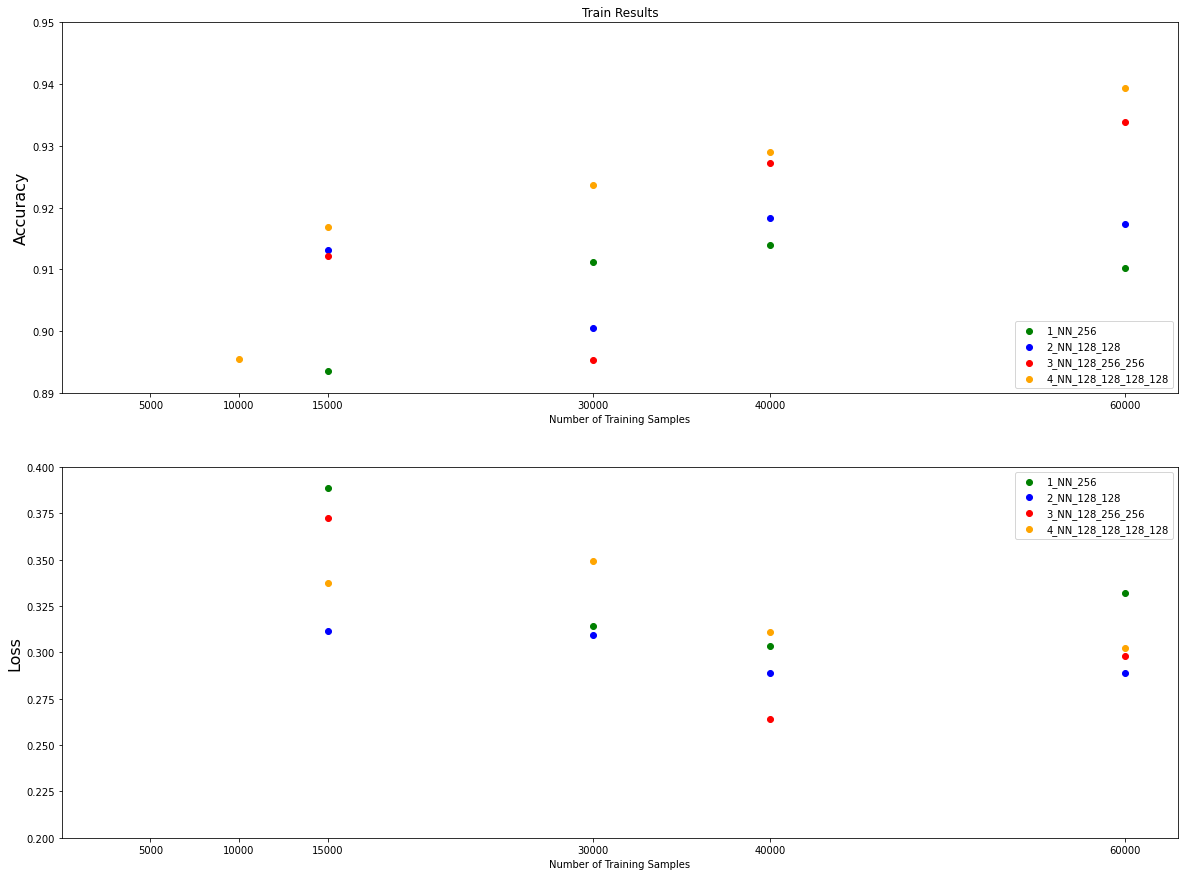

In [ ]:
# ~ Plotting Section ~
ticks = [5000,10000,15000,30000,40000,60000]
plt.figure(1,figsize=(20,15))
plt.subplot(2,1,1)
plt.title('Train Results')
plt.xlabel("Number of Training Samples")
plt.ylabel('Accuracy', fontsize=16)
# For practical reasons, you can change the limits of each axis
plt.xlim(0,63000)
plt.ylim(0.89,0.95)
plt.xticks(ticks=ticks)
plt.scatter(s,models_loss[name1],color='green',label=name1)
plt.scatter(s,models_loss[name2],color='blue',label=name2)
plt.scatter(s,models_loss[name3],color='red',label=name3)
plt.scatter(s,models_loss[name4],color='orange',label=name4)
plt.legend(loc='lower right')

plt.subplot(2,1,2)
plt.ylabel('Loss', fontsize=16)
plt.xlabel("Number of Training Samples")
plt.xticks(ticks=ticks)
plt.xlim(0,63000)
plt.ylim(0.2,0.4)
plt.scatter(s,models_accur[name1],color='green',label=name1)
plt.scatter(s,models_accur[name2],color='blue',label=name2)
plt.scatter(s,models_accur[name3],color='red',label=name3)
plt.scatter(s,models_accur[name4],color='orange',label=name4)
plt.legend(loc='upper right')
plt.show()
